In [194]:
import random

import os
import sys

import numpy as np
import torch

from PIL import Image

from skimage import io
import matplotlib.pyplot as plt
import cc3d

In [195]:
data_path = os.curdir + os.sep + "data" + os.sep + "Dataset011_Cell"
external_image_dir_path = data_path + os.sep + "imagesTs-External"
internal_image_dir_path = data_path + os.sep + "imagesTs-Internal"

submission_path = os.curdir + os.sep + "submission"

unet_submission_path = submission_path + os.sep + "unet"
unet_external_path = unet_submission_path + os.sep + "external"
unet_internal_path = unet_submission_path + os.sep + "internal"

transformer_submission_path = submission_path + os.sep + "transformer"
transformer_external_path = transformer_submission_path + os.sep + "external"
transformer_internal_path = transformer_submission_path + os.sep + "internal"

bonus_submission_path = submission_path + os.sep + "bonus"
bonus_external_path = bonus_submission_path + os.sep + "external"
bonus_internal_path = bonus_submission_path + os.sep + "internal"

In [203]:
external_images = os.listdir(external_image_dir_path)
external_images_paths = [external_image_dir_path + os.sep + image for image in external_images]

internal_images = os.listdir(internal_image_dir_path)
internal_images_paths = [internal_image_dir_path + os.sep + image for image in internal_images]

# unet
external_submission_unet = os.listdir(unet_external_path)
external_submission_paths_unet = [unet_external_path + os.sep + image for image in external_submission_unet]

internal_submission_unet = os.listdir(unet_internal_path)
internal_submission_paths_unet = [unet_internal_path + os.sep + image for image in internal_submission_unet]

# transformer
external_submission_transformer = os.listdir(transformer_external_path)
external_submission_paths_transformer = [transformer_external_path + os.sep + image for image in external_submission_transformer]

internal_submission_transformer = os.listdir(transformer_internal_path)
internal_submission_paths_transformer = [transformer_internal_path + os.sep + image for image in internal_submission_transformer]

# bonus (DINOv2)
internal_submission_bonus = os.listdir(bonus_internal_path)
internal_submission_paths_bonus = [bonus_internal_path + os.sep + image for image in internal_submission_bonus]

external_submission_bonus = os.listdir(bonus_external_path)
external_submission_paths_bonus = [bonus_external_path + os.sep + image for image in external_submission_bonus]

# Sanity Check

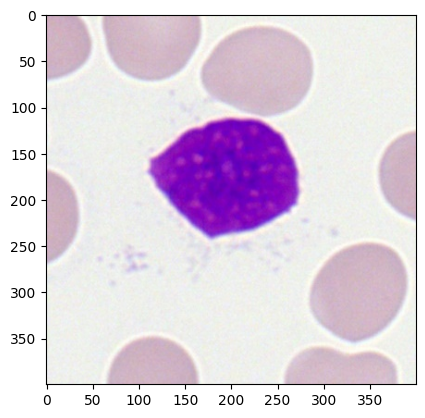

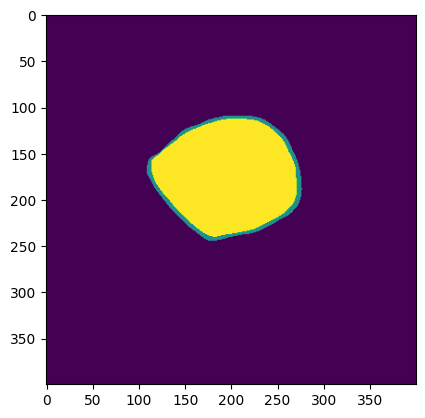

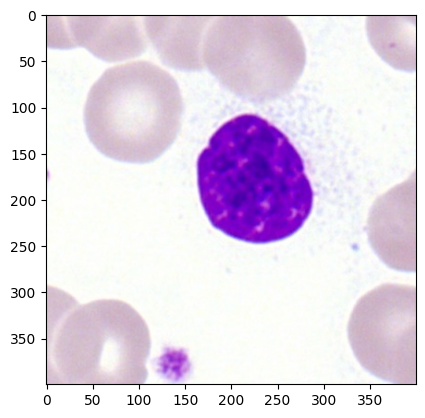

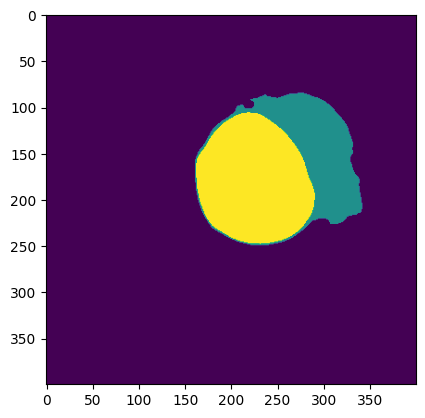

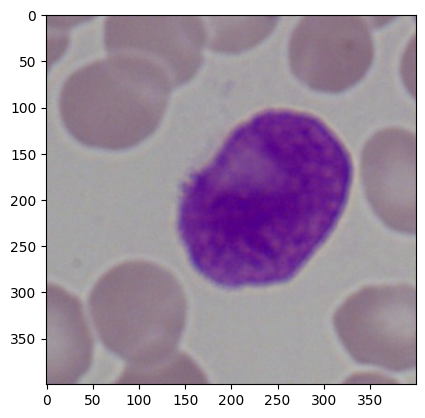

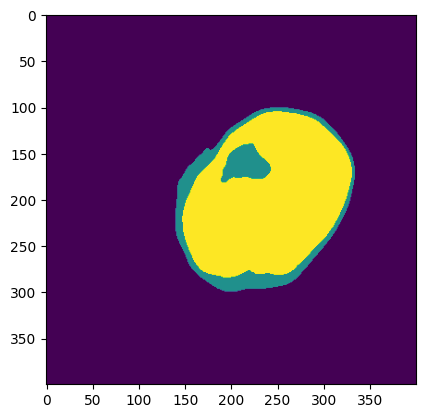

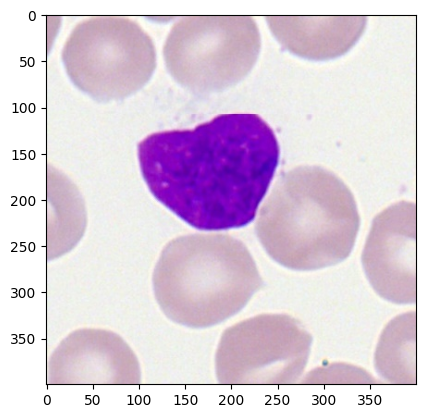

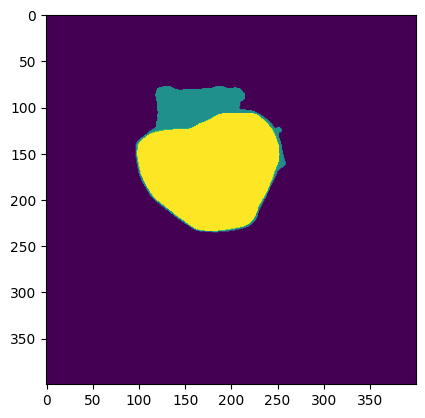

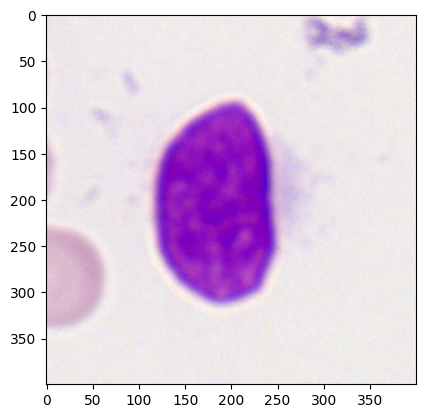

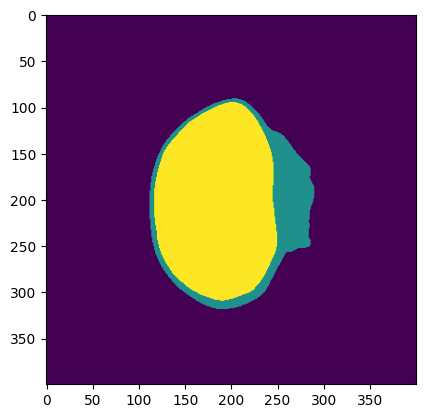

In [197]:
for i in range(5):
    image_ex, pred_ex = Image.open(external_images_paths[i]), io.imread(external_submission_paths_unet[i])
    pred_ex = Image.fromarray(pred_ex * 100)
    
    plt.imshow(image_ex)
    plt.show()
    
    plt.imshow(pred_ex)
    plt.show()

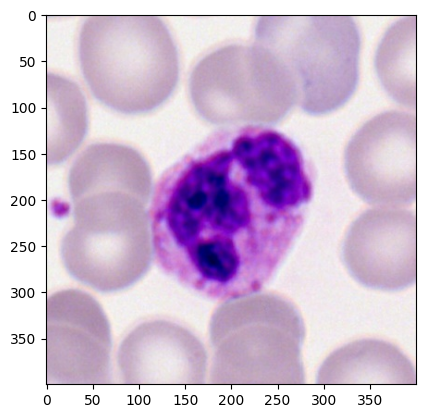

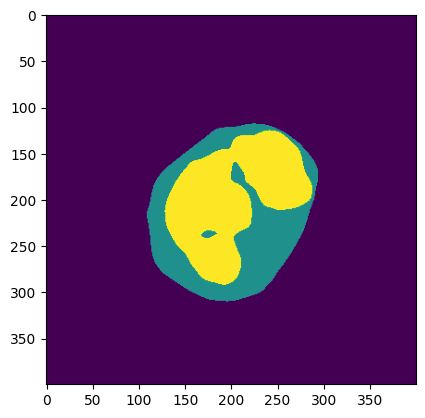

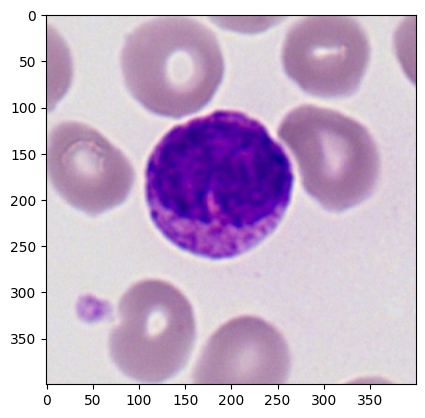

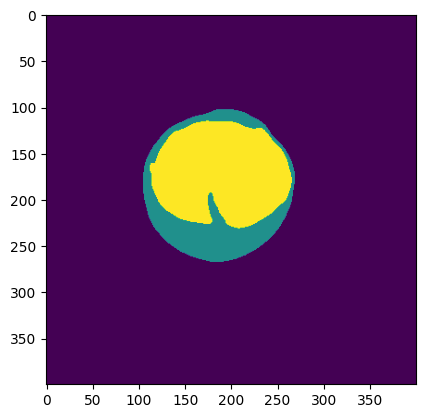

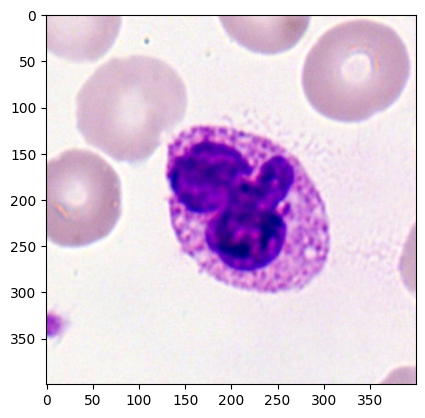

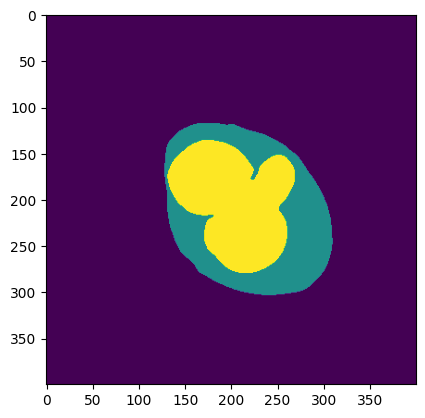

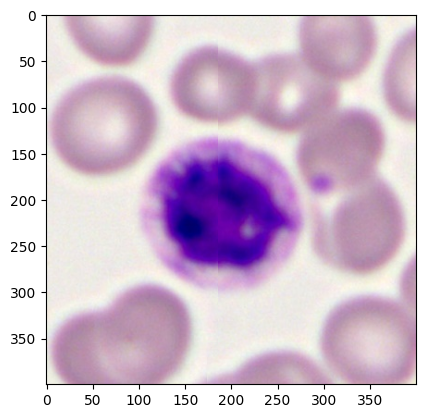

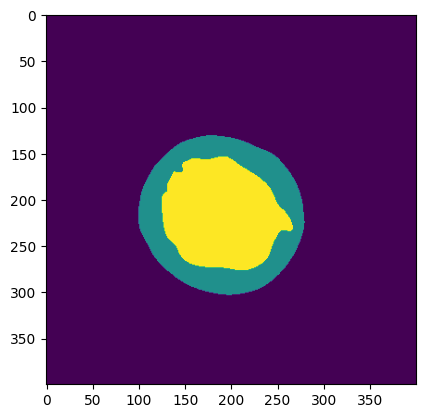

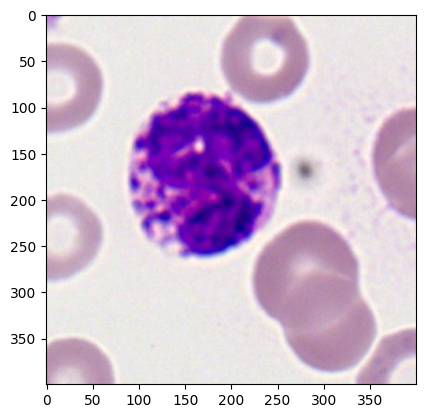

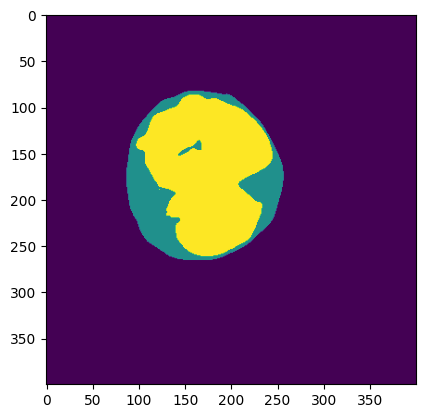

In [198]:
for i in range(5):
    image_ex, pred_ex = Image.open(internal_images_paths[i]), io.imread(internal_submission_paths_unet[i])
    pred_ex = Image.fromarray(pred_ex * 100)
    
    plt.imshow(image_ex)
    plt.show()
    
    plt.imshow(pred_ex)
    plt.show()

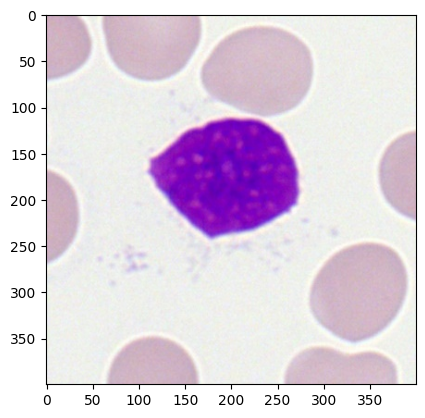

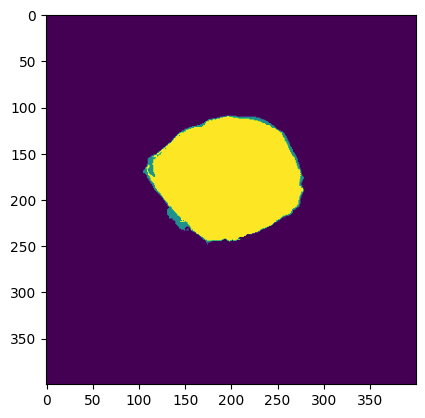

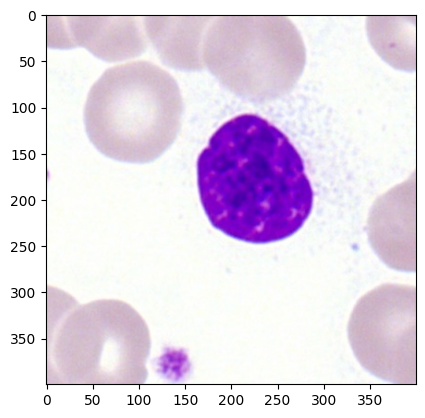

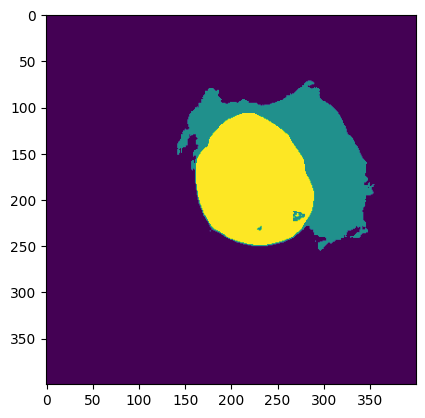

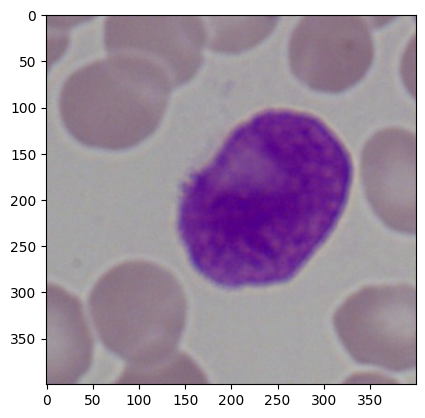

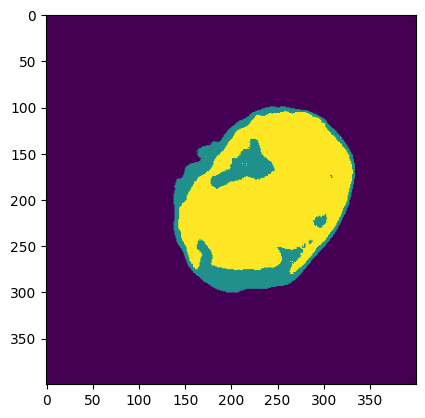

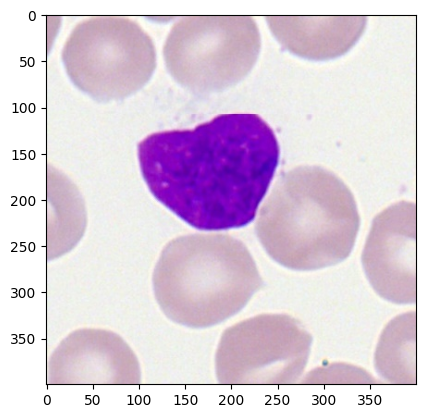

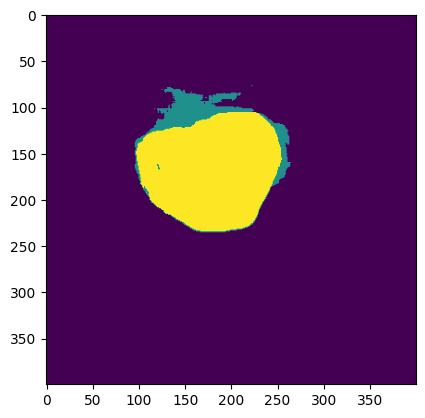

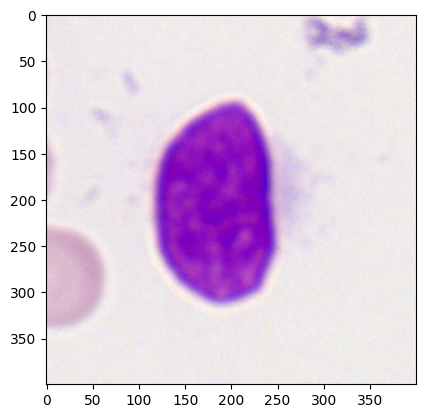

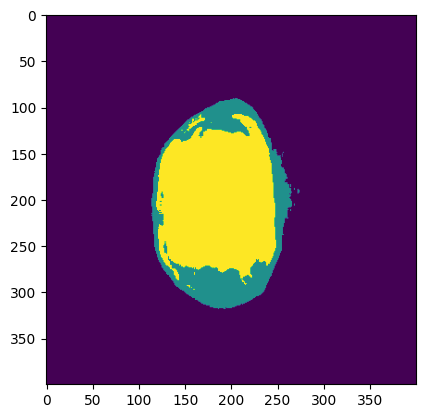

In [129]:
for i in range(5):
    image_ex, pred_ex = Image.open(external_images_paths[i]), io.imread(external_submission_paths_transformer[i])
    pred_ex = Image.fromarray(pred_ex * 100)
    
    plt.imshow(image_ex)
    plt.show()
    
    plt.imshow(pred_ex)
    plt.show()

(400, 400)


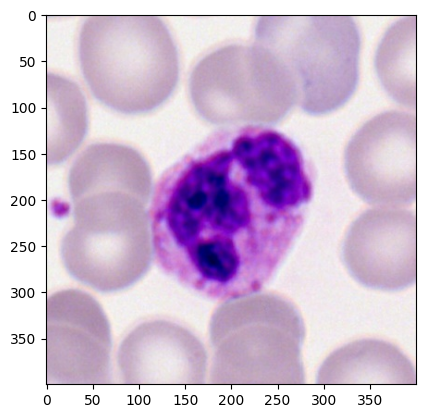

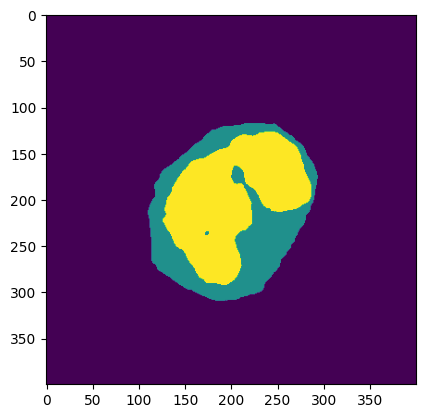

(400, 400)


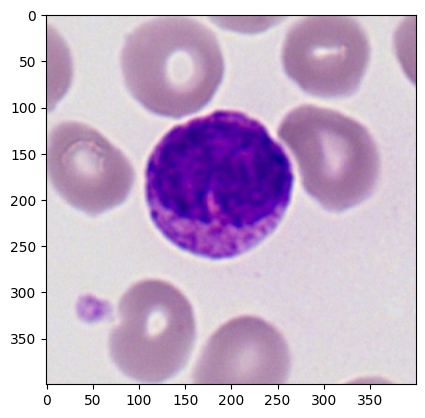

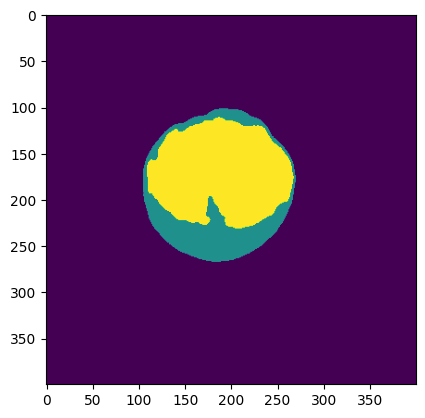

(400, 400)


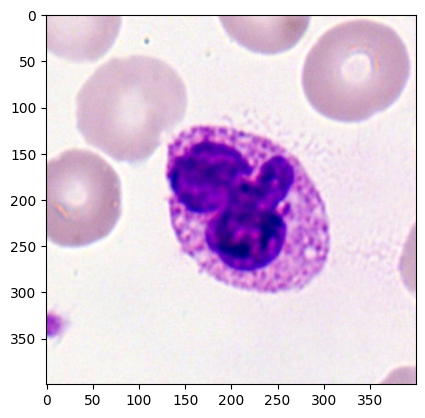

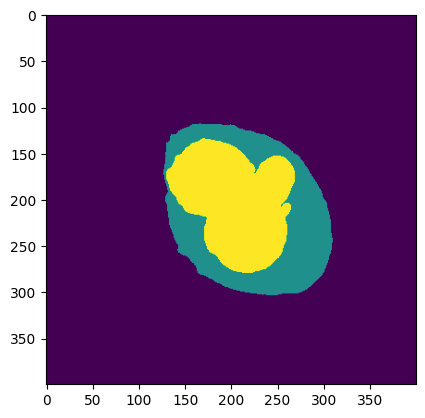

(400, 400)


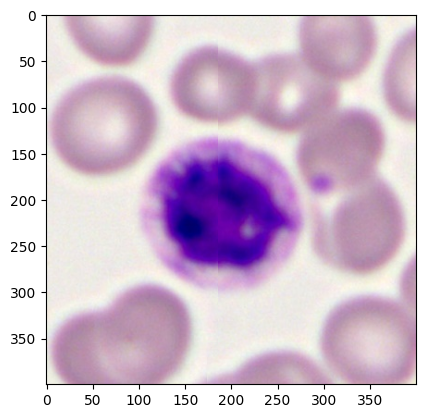

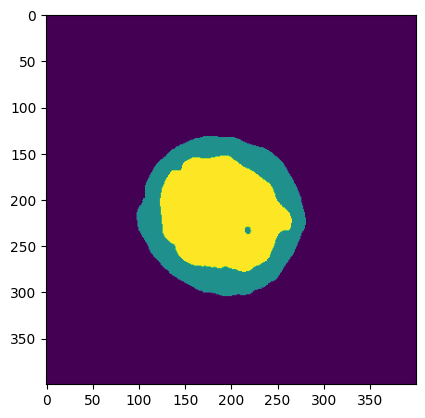

(400, 400)


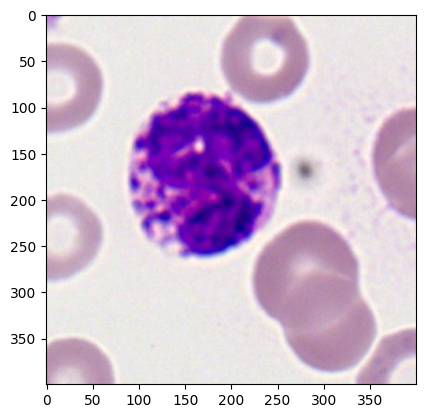

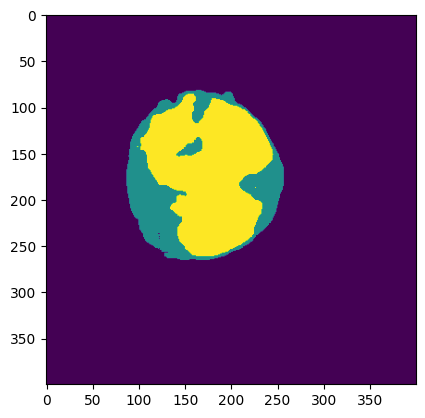

In [148]:
for i in range(5):
    image_ex, pred_ex = Image.open(internal_images_paths[i]), io.imread(internal_submission_paths_transformer[i])
    pred_ex = Image.fromarray(pred_ex * 100)
    
    plt.imshow(image_ex)
    plt.show()
    
    plt.imshow(pred_ex)
    plt.show()

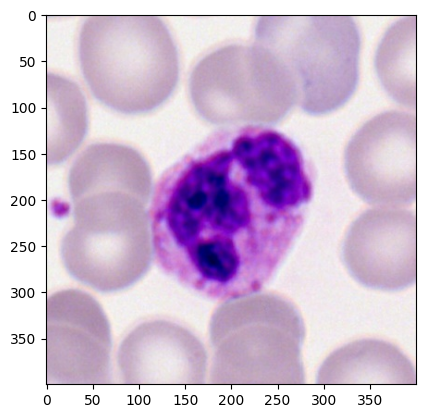

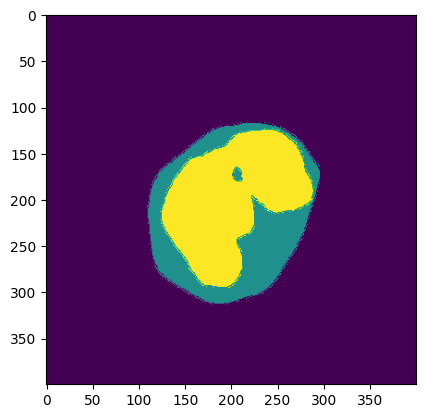

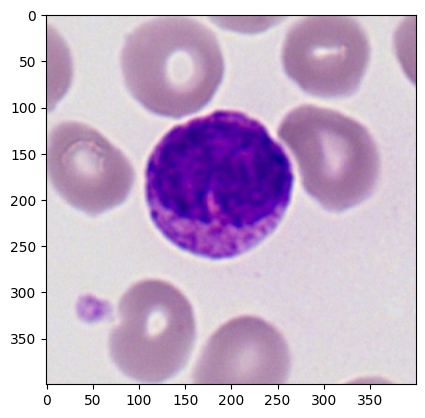

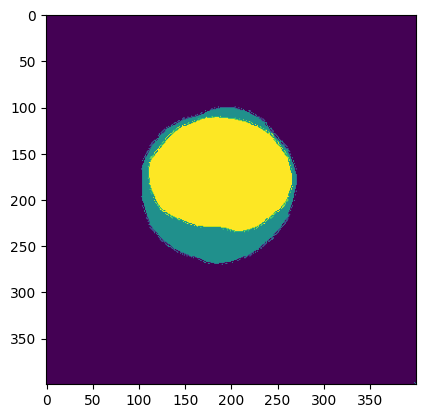

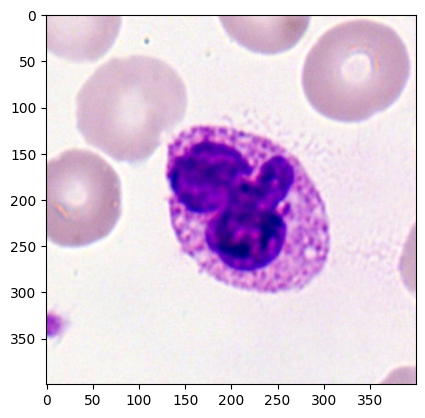

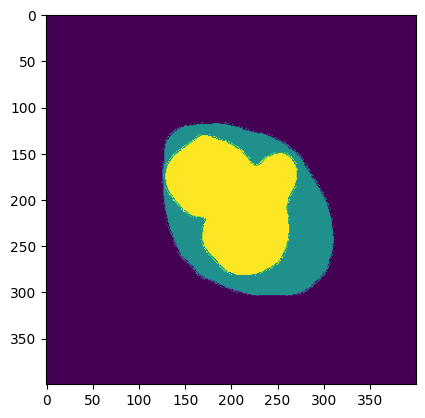

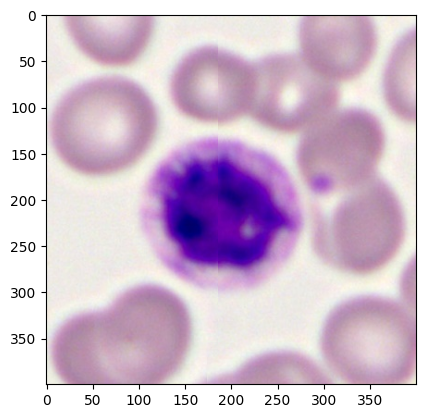

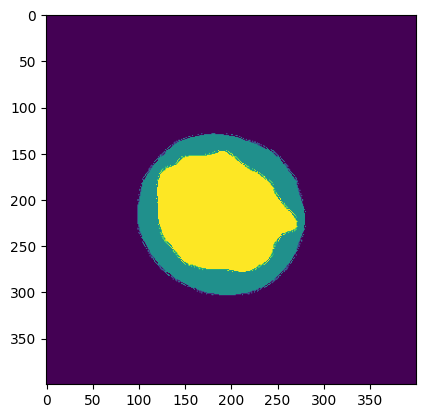

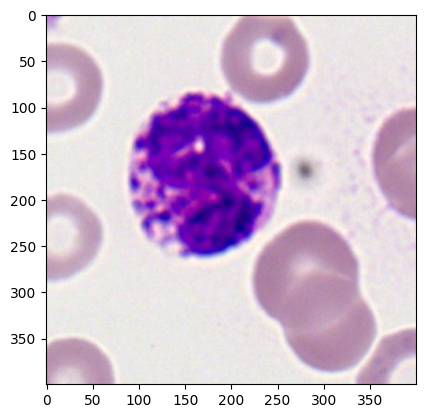

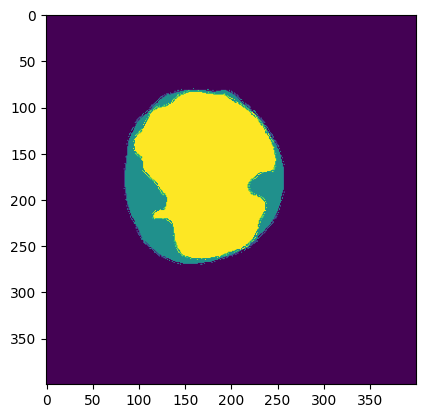

In [153]:
for i in range(5):
    image_ex, pred_ex = Image.open(internal_images_paths[i]), io.imread(internal_submission_paths_bonus[i])
    pred_ex = Image.fromarray(pred_ex * 100)
    
    plt.imshow(image_ex)
    plt.show()
    
    plt.imshow(pred_ex)
    plt.show()

# Post processing for SwinUNETR and DINOv2.

In [156]:
import cc3d
import numpy as np
from skimage import io
from PIL import Image

def cc3m_largest_k(predictions_paths):
    """
    Processes a list of prediction mask file paths, simplifying each mask by retaining only the 
    largest object when considering specific labels (label 1 and label 2) as a single combined category. 
    This function is particularly useful when you have nested or closely related labels where one 
    (label 2) is within another (label 1) and you wish to treat them as a single object for analysis 
    or visualization purposes. After identifying and keeping the largest object, it maps the result 
    back to the original label distinctions where applicable.
    """
    for prediction_path in predictions_paths:
        try:
            prediction = io.imread(prediction_path)
            combined_label_mask = np.where((prediction == 1) | (prediction > 1), 1, 0).astype(np.uint8)
            largest_object = cc3d.largest_k(
                combined_label_mask, k=1, 
                connectivity=8, delta=0,
            ).astype(np.uint8)
            original_labels_mapped_back = np.where((largest_object == 1) & (prediction == 2), 2, 0)
            original_labels_mapped_back = np.where((largest_object == 1) & (prediction == 1), 1, original_labels_mapped_back).astype(np.uint8)
            prediction_image = Image.fromarray(original_labels_mapped_back)
            
            prediction_image.save(prediction_path)

        except Exception as e:
            print(f"could not apply cc3m for path {prediction_path}: {e}")

cc3m_largest_k(internal_submission_paths_transformer)
cc3m_largest_k(external_submission_paths_transformer)
cc3m_largest_k(internal_submission_paths_bonus)
cc3m_largest_k(external_submission_paths_bonus)

# Rename files/folders for submission. 

In [199]:
def rename_images_for_submission(image_paths, prefix=""):
    image_dir = f"{os.sep}".join(image_paths[0].split(os.sep)[:-1])
    for indx in range(len(image_paths)):
        image_name = image_paths[indx].split(os.sep)[-1]
        image_extension = image_paths[indx].split(".")[-1]
        new_image_name = prefix + image_name[:8].replace("cell", "img") + "_label" + f".{image_extension}"
        os.rename(image_paths[indx], image_dir + os.sep + new_image_name)

In [201]:
rename_images_for_submission(internal_submission_paths_transformer, prefix="Internal_")
rename_images_for_submission(external_submission_paths_transformer, prefix="External_")
rename_images_for_submission(internal_submission_paths_bonus, prefix="Internal_")
rename_images_for_submission(external_submission_paths_bonus, prefix="External_")
rename_images_for_submission(internal_submission_paths_unet, prefix="Internal_")
rename_images_for_submission(external_submission_paths_unet, prefix="External_")